In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Small preprocessing step


data = pd.read_csv('NHL2018.csv',header='infer')

for index,row in data.iterrows():
    if row['Pos'] == 'D':
        data.at[index,'Off'] = 'No'
    else:
        data.at[index,'Off'] = 'Yes'


        
Y = data['Off']
X = data.drop('Pos',axis=1)
X = X.drop('Off',axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)



In [3]:
data.head()


Age Pos  GP   G   A  PTS  +/-  PIM  Off
0   30  LW  75  13  22   35  -11   78  Yes
1   24  LW  53   4  12   16    9   10  Yes
2   24  LW  37   2   6    8    8    8  Yes
3   24  LW  16   2   6    8    1    2  Yes
4   26   C  60  10   1   11   -6    9  Yes

In [4]:
Y_train.head()

2358    Yes
3773     No
3451    Yes
3361     No
3286     No
Name: Off, dtype: object

Decision tree classifier:
Best hyperparameter, maxdepth = 5
Test Accuracy = 0.7542304593070105


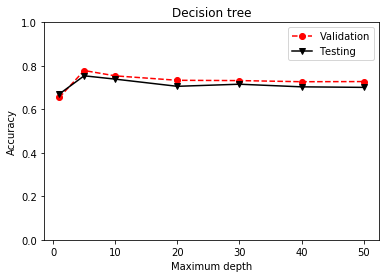

In [6]:
maxdepths = [1,5,10,20,30,40,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier( max_depth=depth )
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit( X_train, Y_train )
    Y_predTest = clf.predict( X_test )
    testAcc[index] = accuracy_score( Y_test, Y_predTest )
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Decision tree classifier:')
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

K-nearest neighbor classifier:
Best hyperparameter, k = 20
Test Accuracy = 0.7316680096696213


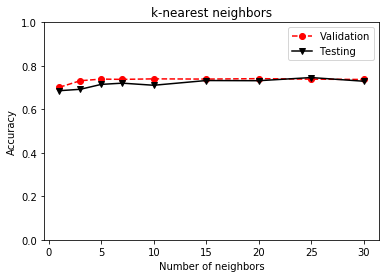

In [26]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1,3,5,7,10,15,20,25,30]
validationAcc = np.zeros(len(numNeighbors))
testAcc = np.zeros(len(numNeighbors))
index = 0

np.random.seed(1)
for nn in numNeighbors:
    clf = KNeighborsClassifier( n_neighbors=nn )
    scores = cross_val_score( clf, X_train, Y_train, cv=10 )
    validationAcc[index] = np.mean(scores)
    clf.fit( X_train,Y_train )
    Y_predTest = clf.predict( X_test )
    testAcc[index] = accuracy_score( Y_test,Y_predTest )
    index += 1
    
plt.plot(numNeighbors, validationAcc, 'ro--', numNeighbors, testAcc, 'kv-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])
plt.ylim([0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('K-nearest neighbor classifier:')
print('Best hyperparameter, k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

In [27]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier(n_estimators=numEstimators )
clf.fit( X_train,Y_train )
Y_pred = clf.predict( X_test )
print('Random forest ensemble classifier:')
print('Test Accuracy =', accuracy_score( Y_test,Y_pred ))

Random forest ensemble classifier:
Test Accuracy = 0.7639000805801772


Best hyperparameter, C = 0.5
Test Accuracy = 0.7647058823529411


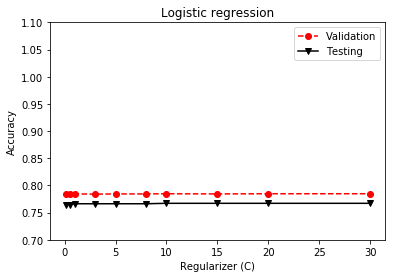

In [28]:
from sklearn import linear_model

regularizers = [0.1,0.5,1,3,5,8,10,15,20,30]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
index = 0

np.random.seed(1)
for C in regularizers:
    clf = linear_model.LogisticRegression(C=C, solver='liblinear', penalty='l1')
    scores = cross_val_score( clf,X_train,Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X_train,Y_train)
    Y_predTest = clf.predict( X_test )
    testAcc[index] = accuracy_score( Y_test,Y_predTest )
    index += 1
    
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.7,1.1])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

Decision tree classifier:
Best hyperparameter, maxdepth = 5
Test Accuracy = 0.7445608380338437


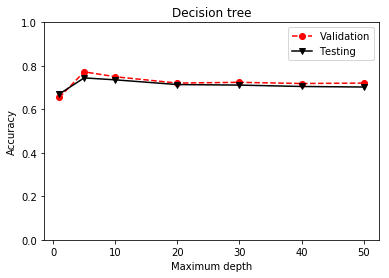

In [7]:
# Re run decision tree classifer on the same data set but without the age and penalty attributes to see if the 
# accuracy changes. If it gets better, then we know that they do not help in the classification

data = pd.read_csv('NHL2018.csv',header='infer')

for index,row in data.iterrows():
    if row['Pos'] == 'D':
        data.at[index,'Off'] = 'No'
    else:
        data.at[index,'Off'] = 'Yes'


        
Y = data['Off']
X = data.drop('Pos',axis=1)
X = X.drop('Off',axis=1)
X = X.drop('Age',axis=1)
X = X.drop('PIM',axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

maxdepths = [1,5,10,20,30,40,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier( max_depth=depth )
    scores = cross_val_score(clf, X_train, Y_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit( X_train, Y_train )
    Y_predTest = clf.predict( X_test )
    testAcc[index] = accuracy_score( Y_test, Y_predTest )
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Decision tree classifier:')
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])